# Vibrato Monte Carlo & Automatic differentiation

The aim of this notebook is to be able to plot all the relevant figures for tests and for the paper

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
def savefig(filename):
    plt.savefig('{}.pdf'.format(filename))

In [3]:
# Figures configuration
width = 6
height = width / 1.618

preamble = r"\usepackage[utf8x]{inputenc}, \usepackage[T1]{fontenc}"
plt.rc('pgf', texsystem='pdflatex', preamble=preamble)
plt.rc('figure', figsize=[width, height], autolayout=True)
plt.rc('font', size=13, family='Serif')
plt.rc('text', usetex=True)
plt.rc('lines', linewidth=1.2)
plt.rc('axes.spines', top=False, right=False)
plt.rc('axes', labelsize=14, grid=False, titlesize=16, titlepad=22)
plt.rc('axes3d', grid=False)
plt.rc('xtick', direction='in', labelsize=14)
plt.rc('ytick', direction='in', labelsize=14)
plt.rc('xtick.minor', visible=True, size=4)
plt.rc('ytick.minor', visible=True, size=4)
plt.rc('xtick.major', size=7.5)
plt.rc('ytick.major', size=7.5)


## Testing Geometric brownian motion

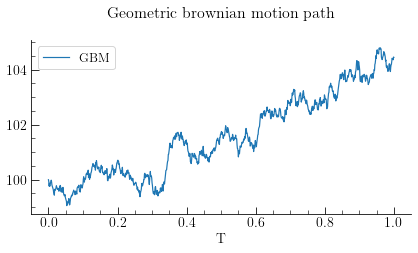

In [4]:
gbm = pd.read_csv('datasets/bspath.csv', header=None, names=['T', 'GBM'], sep=';', index_col=0)
gbm.plot(title="Geometric brownian motion path");
savefig('outputs/gbm')

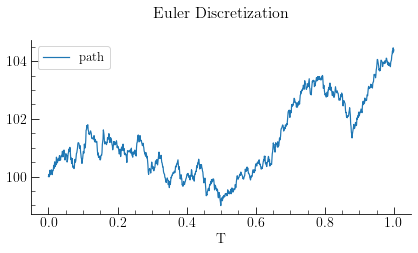

In [5]:
euler = pd.read_csv('datasets/bseulerpath.csv', header=None, names=['T', 'path'], sep=';', index_col=0)
euler.plot(title="Euler Discretization");
savefig('outputs/euler')

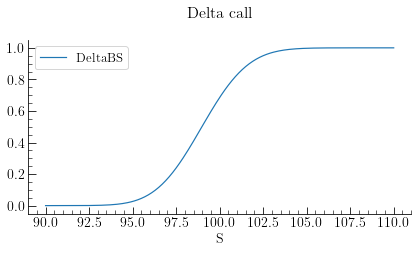

In [6]:
delta_call = pd.read_csv('datasets/bscalldelta.csv', header=None, names=['S', 'DeltaBS'], sep=';', index_col=0)
delta_call.plot(title="Delta call");

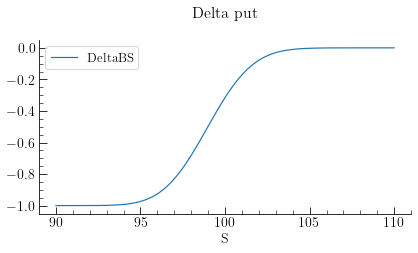

In [7]:
delta_put = pd.read_csv('datasets/bsputdelta.csv', header=None, names=['S', 'DeltaBS'], sep=';', index_col=0)
delta_put.plot(title="Delta put");

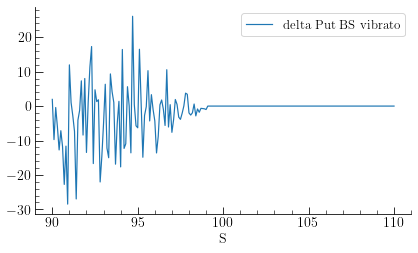

In [8]:
delta_vibrato_put = pd.read_csv('datasets/vibratobsputdelta.csv', header=None, names=['S', 'delta Put BS vibrato'], sep=';', index_col=0)
delta_vibrato_put.plot();

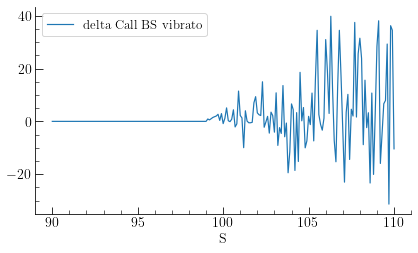

In [9]:
delta_vibrato_call = pd.read_csv('datasets/vibratobscalldelta.csv', header=None, names=['S', 'delta Call BS vibrato'], sep=';', index_col=0)
delta_vibrato_call.plot();

In [136]:
def payoff(S):
    return max(S - K, 0)



S = 100
K = 100
T = 1
r = 0.02
sigma = 0.03
n = 100
M = 100
Mz = 50



def delta_vibrato(S):
    h = T/n
    times = [0.]
    X = S
    Y = 1.
    total = 0
    for k in range(M):
        for i in range(n-1):
            Wh = np.random.randn() * np.sqrt(h)
            X *= (1+r*h + sigma * Wh)
            Y *= (1+ r*h + sigma * Wh)

        mun = X* (1+r*h)
        sigman = X * sigma * np.sqrt(h)
        dmun = Y * (1+r*h)
        dsigman = Y * sigma * np.sqrt(h) 
        subtotal = 0
        for j in range(Mz):
            Z = np.random.randn() 
            V = payoff(mun + sigman * Z)
            subtotal = dmun* V * Z / sigman + dsigman * V * (Z**2 -1) / sigman
        total += subtotal / Mz
    return np.exp(-r*T) * total / M

In [143]:
delta_vibrato(S)

6.045122696244699

In [144]:
data = []
for S in np.linspace(90, 120, 200):
    data.append(delta_vibrato(S))

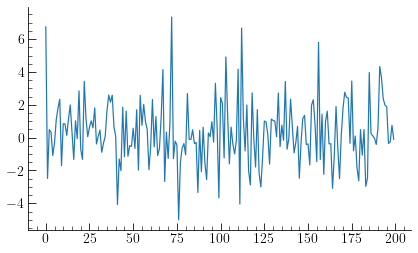

In [145]:
plt.plot(data)